# Zeta Disease Prediction

### About:

Mars Mission Control needs a good data-driven system for predicting Zeta Disease infection on the International Mars Colony.
Use the `_zeta-disease_training-data_` dataset to build a model that can predict who will be infected by Zeta Disease.
Apply your model to the `_zeta-disease_prediction-data_` dataset to predict who will be infected by Zeta Disease.
 {0 : No Zeta Disease ,1 : Zeta Disease }

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
os.getcwd()
path= os.getcwd() +'\\assgnment'

In [4]:
test = pd.read_csv(path +"\\2021-01-21_zeta-disease_prediction-data_dsi-take-home-challenge.csv")
df  =  pd.read_csv(path +"\\2021-01-21_zeta-disease_training-data_dsi-take-home-challenge.csv")

## Exploring Data

In [15]:
df.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


In [16]:
df.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,30.985000,172.407500,32.201625,69.565000,85.887500,0.544496,43.121250,4.051250,0.348750
std,13.824025,31.942438,8.549155,19.874784,126.333656,0.348711,30.409949,4.176173,0.476873
min,18.000000,94.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000
25%,21.000000,149.000000,27.300000,62.000000,0.000000,0.307800,0.000000,1.000000,0.000000
50%,26.000000,167.000000,32.050000,72.000000,45.000000,0.445300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.525000,80.000000,130.000000,0.699800,62.000000,6.000000,1.000000
max,109.000000,308.000000,86.100000,157.000000,1077.000000,3.481300,214.000000,40.000000,1.000000


In [17]:
df.isna().sum()

age                   0
weight                0
bmi                   0
blood_pressure        0
insulin_test          0
liver_stress_test     0
cardio_stress_test    0
years_smoking         0
zeta_disease          0
dtype: int64

There are no missing values.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
age                   800 non-null int64
weight                800 non-null int64
bmi                   800 non-null float64
blood_pressure        800 non-null int64
insulin_test          800 non-null int64
liver_stress_test     800 non-null float64
cardio_stress_test    800 non-null int64
years_smoking         800 non-null int64
zeta_disease          800 non-null int64
dtypes: float64(2), int64(7)
memory usage: 56.4 KB


All dependent features are numerical values

Exploring the Target Variable

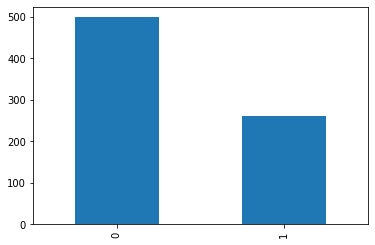

In [25]:
df.zeta_disease.value_counts().plot.bar()

In [21]:
print(df.corr()["zeta_disease"].abs().sort_values(ascending=False))

zeta_disease          1.000000
weight                0.471155
bmi                   0.271856
years_smoking         0.195261
age                   0.192925
liver_stress_test     0.184738
insulin_test          0.126504
blood_pressure        0.045739
cardio_stress_test    0.036090
Name: zeta_disease, dtype: float64


 the above correlation value shows that weight is most correlated with target variable but cardio_stress_test is least correlated.

Mean weight of the people facing the risk of zeta 193.27862595419847


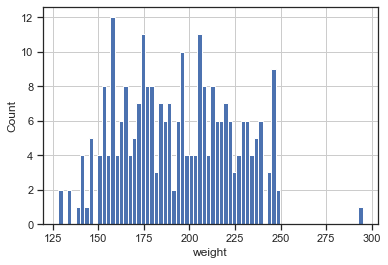

In [78]:
df[df['zeta_disease']==1]['weight'].hist(bins=70)
plt.xlabel('weight')
plt.ylabel('Count')
print('Mean weight of the people facing the risk of zeta',df[df['zeta_disease']==1]['weight'].mean())

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\aksha.LAPTOP-KKEAULMJ\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


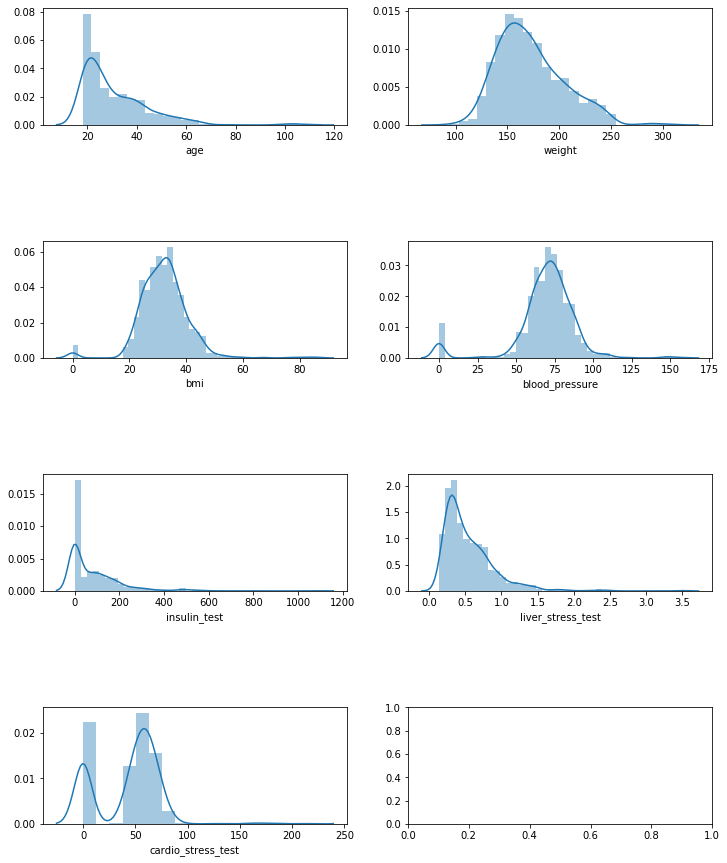

In [40]:
### checking the distributions
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,col in enumerate(df.columns[:7]):
    row,c = idx//2,idx%2
    sns.distplot(df[col],ax=axes[row,c])
plt.subplots_adjust(hspace=1)

 insulin test is skewed to right

Let us visualise the distribution of numercal features wth the bnary target varable


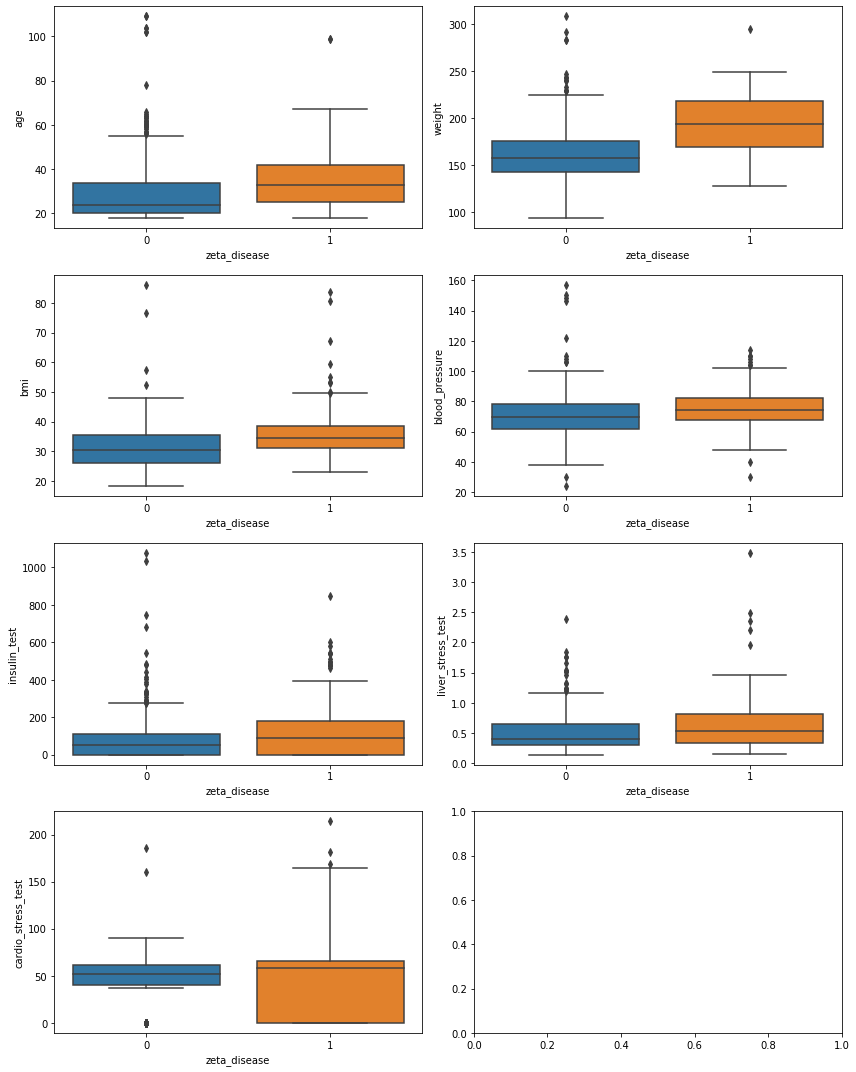

In [24]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,col in enumerate(df.columns[:7]):
    row,c = idx//2,idx%2
    sns.boxplot(x='zeta_disease',y=col,data=df,ax=axes[row,c])
plt.subplots_adjust(hspace=1)
fig.tight_layout()

We can observe that people who are over 170 kgs are more prone to disease and also cardio stress test levels are low 

## box plot for outlier visualization


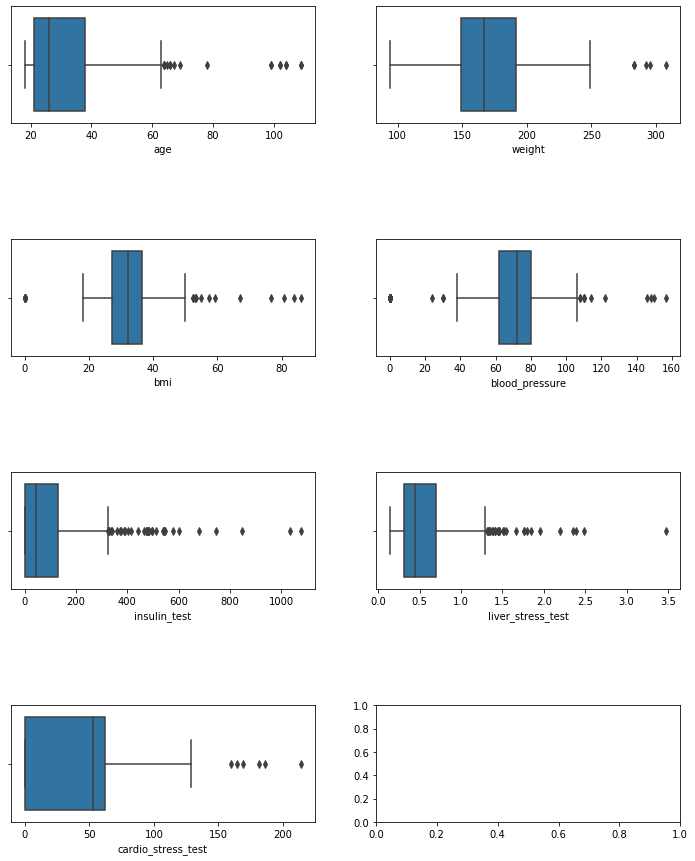

In [42]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,col in enumerate(df.columns[:7]):
    row,c = idx//2,idx%2
    sns.boxplot(df[col],ax=axes[row,c])
plt.subplots_adjust(hspace=1)

We could observe some outliers across most numerical variables

In [66]:
df.shape

(800, 9)

### Feature Engineering

In [5]:
## removing unusual values [low ] from bmi and blood pressue
y=np.where(df['bmi']<1)
z=np.where(df['blood_pressure']<10)
df.drop(df.iloc[z].index|(df.iloc[y].index),inplace=True)


In [69]:
df.shape

(761, 9)

In [48]:
df.age.max()

109

#### Modelling

In [6]:

x =df.drop(['zeta_disease'],axis=1)
           
y =df['zeta_disease']

In [7]:

#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify =y,random_state =42)

In [26]:
from sklearn.metrics import f1_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [27]:

dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, y_train)
y_pred = dectree.predict(X_test)
print("Test F1 Score using Decision Tree ", f1_score(y_test,y_pred))
print("Test Accuracy using Decision Tree ", accuracy_score(y_test,y_pred))


Test F1 Score using Decision Tree  0.6274509803921567
Test Accuracy using Decision Tree  0.7516339869281046


In [30]:
from sklearn.model_selection import GridSearchCV
params={'class_weight':['balanced',None],
'penalty':['l1','l2'],
'C':np.linspace(0.0001,1000,10)}
# we can certainly try much higher ranges
model=LogisticRegression(fit_intercept=True)

In [32]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring="f1_macro",n_jobs=-1)
grid_search.fit(X_train,y_train)

C:\Users\aksha.LAPTOP-KKEAULMJ\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\aksha.LAPTOP-KKEAULMJ\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.000000e-04, 1.111112e+02, 2.222223e+02, 3.333334e+02,
       4.444445e+02, 5.555556e+02, 6.666667e+02, 7.777778e+02,
       8.888889e+02, 1.000000e+03]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', r

In [33]:
lr=grid_search.best_estimator_
y_pred=lr.predict(X_test)
print("Test F1 Score using Logistic Regression  ", f1_score(y_test,y_pred))
print("Test Accuracy using Logistic Regression  ", accuracy_score(y_test,y_pred))

Test F1 Score using Logistic Regression   0.6923076923076923
Test Accuracy using Logistic Regression   0.7908496732026143


In [12]:

rfc = RandomForestClassifier(random_state=42)

parameters={
'bootstrap': [True],
'max_depth': [10, 20,5],
'min_samples_leaf': [3, 4,2],
'min_samples_split': [4, 6,2],
'n_estimators': [100, 200],
}
grid_search_r= GridSearchCV(rfc, parameters, cv=3,n_jobs=-1,verbose=2)
grid_search_r.fit(X_train,y_train)


Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:   19.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bo

In [34]:

rfc =grid_search_r.best_estimator_
y_pred=rfc.predict(X_test)
print("Test F1 Score using Random Forest", f1_score(y_test,y_pred))
print("Test Accuracy using Random Forest ", accuracy_score(y_test,y_pred))

Test F1 Score using Random Forest 0.6222222222222221
Test Accuracy using Random Forest  0.7777777777777778


In [95]:
test.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.0
mean,34.750000,178.800000,34.480000,78.500000,145.050000,1.569600,61.950000,6.050000,NaN
std,11.511436,27.935264,6.628773,14.005638,75.964309,0.230356,9.703363,3.471311,NaN
min,19.000000,120.000000,25.800000,59.000000,50.000000,1.249800,43.000000,2.000000,NaN
25%,26.250000,153.250000,30.250000,69.750000,76.250000,1.411800,55.750000,3.000000,NaN
50%,34.500000,188.500000,33.150000,72.500000,137.000000,1.483300,60.000000,5.500000,NaN
75%,44.250000,197.750000,37.600000,89.250000,167.750000,1.737800,68.000000,7.500000,NaN
max,60.000000,216.000000,50.700000,108.000000,362.000000,2.050800,83.000000,13.000000,NaN


In [97]:
test.isna().sum()

age                    0
weight                 0
bmi                    0
blood_pressure         0
insulin_test           0
liver_stress_test      0
cardio_stress_test     0
years_smoking          0
zeta_disease          20
dtype: int64

In [105]:
test.drop(['zeta_disease'],axis=1,inplace=True)

### Predictions on test data

We will choose Logistic Regression as it had  better score for both F1 score and Accuracy.

In [106]:
pred=lr.predict(test)

In [109]:
test['zeta_disease']=pred

In [110]:
test

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,24,151,39.5,69,72,1.3968,56,4,1
1,27,179,35.5,89,156,1.6608,43,6,1
2,34,147,26.9,76,74,1.6958,53,2,0
3,35,206,32.4,73,127,1.4608,61,6,1
4,60,193,29.8,62,192,1.7798,65,9,1
5,45,120,36.5,108,50,1.2978,54,12,0
6,20,139,38.2,61,77,1.5818,68,3,0
7,23,137,31.2,70,73,1.4168,59,7,0
8,36,195,30.5,59,141,1.4498,59,6,1
9,19,193,25.8,84,66,1.7938,50,3,1
